In [2]:
%pip install scikit-learn matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler



Note: you may need to restart the kernel to use updated packages.


In [4]:
covidtotals = pd.read_csv('data/covidtotals.csv')
covidtotals.set_index('iso_code', inplace=True)

standardizer = StandardScaler()
analysisvars = ['location', 'total_cases_pm', 'total_deaths_pm', 'pop_density', 'median_age', 'gdp_per_capita']
covidtotals.isnull().sum()



lastdate             0
location             0
total_cases          0
total_deaths         0
total_cases_pm       0
total_deaths_pm      0
population           0
pop_density         22
median_age          37
gdp_per_capita      40
hosp_beds           61
vac_per_hund       218
aged_65_older       43
life_expectancy      4
hum_dev_ind         44
region               0
dtype: int64

In [5]:
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])



In [6]:
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=.1, max_features=1)
clf.fit(covidanalysisstand)

IsolationForest(contamination=0.1, max_features=1)

In [7]:
covidanalysis['anomaly'] = clf.predict(covidanalysisstand)
covidanalysis['scores'] = clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()


anomaly
 1    162
-1     18
Name: count, dtype: int64

In [9]:
inlier, outlier = covidanalysis.loc[covidanalysis['anomaly'] == 1], covidanalysis.loc[covidanalysis['anomaly'] == -1]

outlier[['location', 'total_cases_pm', 'total_deaths_pm', 'median_age', 'gdp_per_capita', 'scores']].sort_values(['scores']).head(10)

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
SGP,Singapore,531183.841,346.637,42.4,85535.383,-0.113048
QAT,Qatar,190908.716,256.017,31.9,116935.600,-0.030343
LUX,Luxembourg,603439.463,1544.161,39.7,94277.965,-0.025834
BRN,Brunei,763475.441,396.435,32.4,71809.251,-0.023902
BHR,Bahrain,473167.024,1043.310,32.4,43290.705,-0.023562
SVN,Slovenia,639407.730,4697.046,44.5,31400.840,-0.019627
AUT,Austria,680262.588,2520.690,44.4,45436.686,-0.018487
JPN,Japan,272715.688,602.606,48.2,39002.223,-0.016258
KOR,South Korea,667207.062,693.495,43.4,35938.374,-0.014109


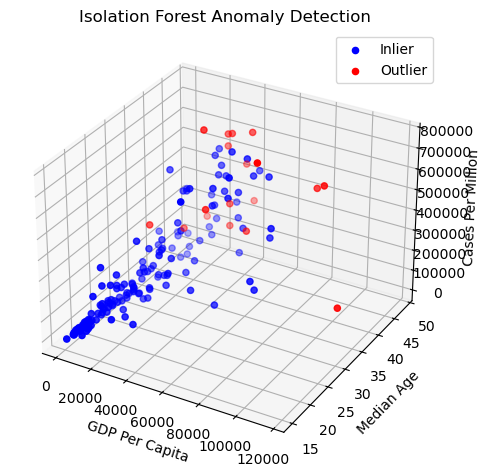

In [10]:
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel('Cases Per Million')
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Median Age')

ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, c='blue', label='Inlier')
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, c='red', label='Outlier')

ax.legend()
plt.tight_layout()
plt.show()